In this worksheet, I sought to find the relationship between educational degree and job/career staisfaction. 

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
pd.set_option('max_columns', None) # set pandas to display all columns

# Import the data
df = pd.read_csv("./data/survey_results_public.csv")
print("There are {} columns and {} rows in the data.".format(df.shape[1], df.shape[0]))

There are 85 columns and 88883 rows in the data.


In [215]:
# Limit the dataset to only those in the United States
df_usa = df[df["Country"]=="United States"]
df_usa.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,Complete a take-home project;Interview with pe...,Yes,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,There is a schedule and/or spec (made by me or...,"Meetings;Non-work commitments (parenting, scho...",All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,"No, but I think we should",Developers and management have nearly equal in...,I have a great deal of influence,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Node.js;Xamarin,Node.js;TensorFlow,Vi

In [216]:
df_usa.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,20949.000000,1.501200e+04,1.498100e+04,16427.000000,12855.000000,18864.000000
mean,44578.031410,1.332268e+12,2.495463e+05,42.106687,4.393629,32.753281
std,25580.904567,1.154200e+14,4.521035e+05,8.364962,4.155152,10.495166
min,4.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22482.000000,7.453750e+04,8.000000e+04,40.000000,2.000000,25.000000
50%,44479.000000,1.020000e+05,1.100000e+05,40.000000,4.000000,31.000000
75%,66817.000000,1.400000e+05,1.600000e+05,45.000000,5.000000,38.000000
max,88880.000000,1.000000e+16,2.000000e+06,168.000000,99.000000,99.000000


There seems to be an error in the values above..a max of $1x10^16 is definitely an error. 

In [234]:
# In order to account for this error, drop all rows where 
# Total Compensation [CompTotal] != Converted Compensation [ConveretedComp]
df = df_usa[["Employment", "EdLevel", "UndergradMajor", "EduOther", "OrgSize", "DevType", "YearsCode", "YearsCodePro", "Age1stCode", "CareerSat", "JobSat", "CompTotal", 'ConvertedComp']]
df = df[df["ConvertedComp"]==df["CompTotal"]]
df.describe()

,CompTotal,ConvertedComp
count,1.295100e+04,1.295100e+04
mean,1.206822e+05,1.206822e+05
std,7.705857e+04,7.705857e+04
min,0.000000e+00,0.000000e+00
25%,8.000000e+04,8.000000e+04
50%,1.070000e+05,1.070000e+05
75%,1.437500e+05,1.437500e+05
max,2.000000e+06,2.000000e+06


In [235]:
# Next drop rows where the total compensation is null and drop the duplicate column ConvertedComp
df.dropna(subset=["CompTotal"], inplace=True)
df.drop(columns = ["ConvertedComp"], inplace=True)
df.isnull().sum()

Employment         13
EdLevel            70
UndergradMajor    654
EduOther          181
OrgSize           256
DevType           196
YearsCode          20
YearsCodePro       46
Age1stCode         31
CareerSat           0
JobSat              6
CompTotal           0
dtype: int64

In [231]:
df.groupby("EdLevel").mean().reset_index()

,EdLevel,CompTotal
0,Associate degree,97100.560976
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",116830.583150
2,I never completed any formal education,131273.285714
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",136697.804598
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",155839.041872
5,Primary/elementary school,118269.205882
6,"Professional degree (JD, MD, etc.)",114845.689655
7,"Secondary school (e.g. American high school, G...",108281.064777
8,Some college/university study without earning ...,117046.136303


## Start over Using Years of coding pro

In [236]:
#Converted the YearsCodePro to Number
def to_num(df, col):
    df.dropna(subset=[col], inplace=True)
    df = df.replace('Less than 1 year', '0')
    #df = df.replace('More than 50 years', '51')
    df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df = to_num(df, 'YearsCodePro')
df = to_num(df, 'YearsCode')

# For those who are currently employed, does their income compare wih education level
HighSchool = df[df.EdLevel.isin(['Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'])]
PostHighSchool = df[df["EdLevel"].isin(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
        'Professional degree (JD, MD, etc.)'])]
HighSchool.head(5)

PostHighSchool.YearsCodePro.unique()




array([ 0.,  8.,  1., 14., 23., 35., 20.,  6.,  2., 10., 48.,  4., 11.,
       12.,  9.,  5., 22.,  3.,  7., 17., 15., 16., 30., 37., 13., 18.,
       19., 28., 27., 25., 39., 33., 34., 24., 21., 38., 29., 44., 36.,
       43., 26., 32., 41., 42., 31., 45., 40., 47., 49., nan, 50.])

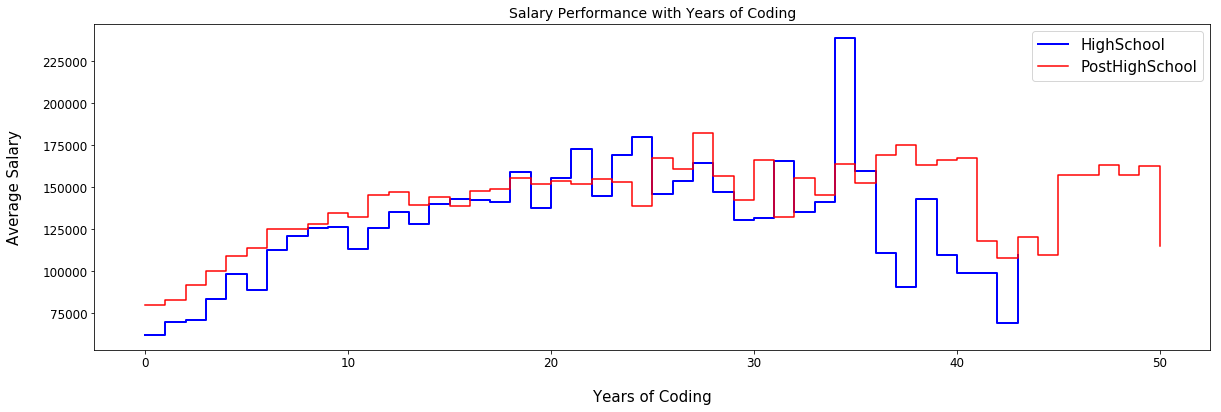

In [238]:
#Plot results 

g1 = HighSchool.groupby("YearsCodePro").mean().reset_index()
g2 = PostHighSchool.groupby("YearsCodePro").mean().reset_index()


fig, ax = plt.subplots(1, 1, figsize=(20, 6))
g1.plot(drawstyle="steps-post", x="YearsCodePro", y="CompTotal", linewidth=2, color='b', ax =ax, label='HighSchool');
g2.plot(drawstyle="steps-post", x="YearsCodePro", y="CompTotal", ax=ax, color='r', label='PostHighSchool');
#g2.plot(kind="scatter", x="YearsCode", y="CompTotal", ax=ax, color='r', label='PostHighSchool');
plt.legend(fontsize=15)

ax.set_ylabel('Average Salary', size=15, labelpad=20)
ax.set_xlabel('Years of Coding', size=15, labelpad=20)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title('Salary Performance with Years of Coding', fontsize=14);


In [239]:
# From the plot above, people with advanced degrees are clearly earning more than those
# with only High School degree with the same years of Coding Experience
# However, as the years of experience increase, the difference becomes smaller.